## Criando um modelo de predição com Validação Cruzada

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict

In [272]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [273]:
df2 = df.drop(columns='gameId')

In [274]:
X = df2.drop(columns=['blueTotalGold']).to_numpy()
y = df2['blueTotalGold'].to_numpy()

## Regressão Linear (LLS)

In [275]:
linear = linear_model.LinearRegression()

In [365]:
scores = cross_val_score(linear, X, y, cv=5)
scores.mean()

1.0

In [277]:
y_predict = cross_val_predict(linear, X, y, cv=5)

In [278]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,17210,17210.0
1,14712,14712.0
2,16113,16113.0
3,15157,15157.0
4,16400,16400.0
5,15899,15899.0
6,16874,16874.0
7,15305,15305.0
8,16401,16401.0
9,15057,15057.0


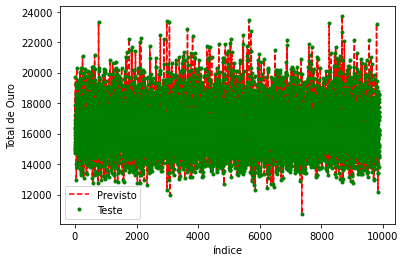

In [279]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y.shape[0]), y, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Regressão de Ridge

In [280]:
ridge = linear_model.Ridge(alpha=32)

In [281]:
scores = cross_val_score(ridge, X, y, cv=5)
scores.mean()

0.9999999999999998

In [282]:
y_predict = cross_val_predict(ridge, X, y, cv=5)

In [283]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,17210,17209.999980
1,14712,14711.999991
2,16113,16113.000006
3,15157,15157.000013
4,16400,16399.999983
5,15899,15899.000001
6,16874,16874.000022
7,15305,15305.000019
8,16401,16400.999975
9,15057,15056.999994


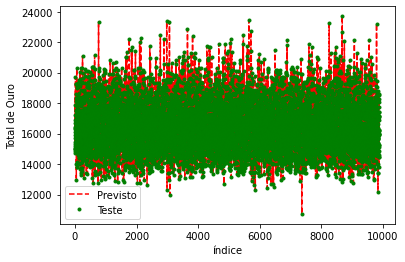

In [284]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y.shape[0]), y, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Lasso

In [363]:
lasso = linear_model.Lasso(alpha=1, max_iter=1757)

In [364]:
scores = cross_val_score(lasso, X, y, cv=5)
scores.mean()

0.999999925538711

In [287]:
y_predict = cross_val_predict(lasso, X_pca, y, cv=5)

In [288]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,17210,17039.197065
1,14712,14725.785242
2,16113,15872.373993
3,15157,15246.803086
4,16400,16383.446936
5,15899,15843.521645
6,16874,16921.674476
7,15305,15593.269437
8,16401,16455.936401
9,15057,15153.126286


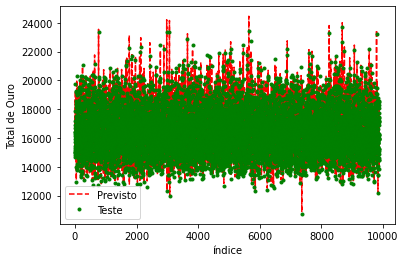

In [289]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y.shape[0]), y, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Elastic Net

In [290]:
enet = linear_model.ElasticNet(alpha=0.1)

In [291]:
scores = cross_val_score(enet, X, y, cv=5)
scores.mean()

0.9999999999918032

In [292]:
y_predict = cross_val_predict(enet, X, y, cv=5)

In [293]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,17210,17209.994447
1,14712,14712.001509
2,16113,16112.995899
3,15157,15157.005047
4,16400,16400.003582
5,15899,15899.001691
6,16874,16873.994114
7,15305,15304.999430
8,16401,16401.003980
9,15057,15057.000729


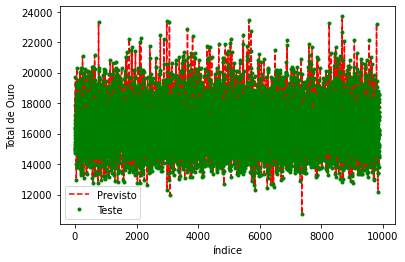

In [294]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y.shape[0]), y, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Regressão Bayesiana

In [325]:
BayesR = linear_model.BayesianRidge(n_iter=16)

In [326]:
scores = cross_val_score(BayesR, X, y, cv=5)
scores.mean()

0.9999793904458606

In [297]:
y_predict = cross_val_predict(BayesR, X, y, cv=5)

In [298]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,17210,17210.039791
1,14712,14711.845468
2,16113,16112.954935
3,15157,15156.911155
4,16400,16399.925031
5,15899,15899.040197
6,16874,16874.100897
7,15305,15304.851902
8,16401,16400.895828
9,15057,15056.949157


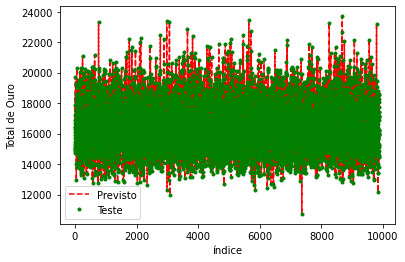

In [299]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y.shape[0]), y, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Utilização de Modelos de Conjunto

### Random Forest

In [264]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [265]:
scores = cross_val_score(Forest, X, y, cv=5)
scores.mean()

0.9998448854825567

In [266]:
y_predict = cross_val_predict(Forest, X, y, cv=5)

In [267]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,17210,17209.4
1,14712,14710.0
2,16113,16112.8
3,15157,15157.1
4,16400,16400.5
5,15899,15899.0
6,16874,16873.4
7,15305,15303.2
8,16401,16402.0
9,15057,15056.4


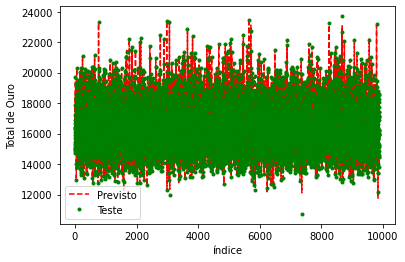

In [268]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y.shape[0]), y, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

### Extremely Randomized Trees

In [269]:
from sklearn.ensemble import ExtraTreesRegressor
Extra = ExtraTreesRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)

In [270]:
scores = cross_val_score(Extra, X, y, cv=5)
scores.mean()

0.9997859988938724

In [145]:
y_predict = cross_val_predict(Forest, X, y, cv=5)

In [146]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,17210,17230.92
1,14712,14765.12
2,16113,16067.77
3,15157,15171.95
4,16400,16547.11
5,15899,15864.50
6,16874,17187.75
7,15305,16050.60
8,16401,16498.53
9,15057,15142.05


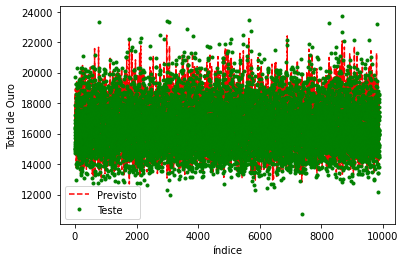

In [147]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y.shape[0]), y, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

### Mesmo com a implementação de Cross-validation, os modelos ainda possuem scores bem próximos de 1. Dessa forma, conclui-se o modelo realmente pode ser representado por uma regressão linear múltipla.